<a href="https://colab.research.google.com/github/tunglamphandam/Titanic/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
train_df = pd.read_csv("train.csv", na_values = ':')
test_df = pd.read_csv("test.csv", na_values = ':')


In [4]:
print(train_df.columns.values)  # In ra 5 giá trị của cột
print(train_df.info())   # Print info (type data, ..... )
print(train_df.describe())

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    

In [5]:
print(train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)) 
print(train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False))
print(train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print(train_df[['Parch', 'Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived', ascending=False))
print(train_df[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print(train_df[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print(train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
      Sex  Survived
0  female  0.742038
1    male  0.188908
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
      Age  Survived
0    0.42       1.0
9    5.00       1.0
79  63.00       1.0
68  53.00       1.0
1    0.67       1.0
..    ...       ...
37  28.50       0.0
49  36.50       0.0
46  34.50       0.0
26  20.50       0.0
30  23.50       0.0

[88 rows x 2 columns]
         Fare  Survived
247  512.3292       1.0
196   57.9792       1.0
89    13.8583       1.0
88    13.7917       1.0
86    13.4167       1.0
..        ...       ...
103   15.5500       0.0
180   47.1000       0.0
179   46.9000       0.0
178   42.4000       0.0
124   21.0750       0.0

[248

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


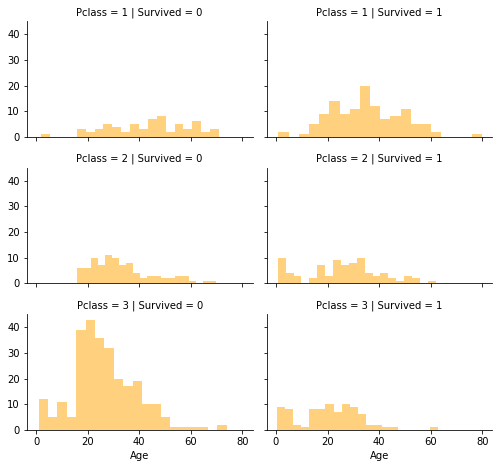

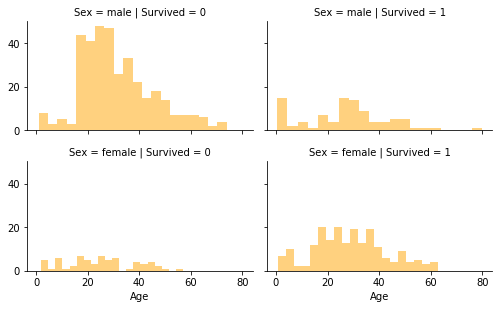

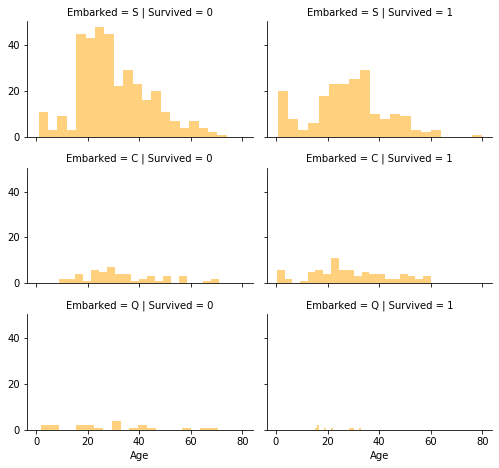

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
#Nhận thấy rằng trong các yếu tố relevant đến survived thì Age là yếu tố biến thiên còn Pclass(1,2,3), Sex(0,1), Embarked(C,S,Q) là bỉnary
#nên khi visualize Age là y-axis
#Visualize tỉ lệ sống sót theo độ tuổi phân chia theo các tầng lớp 
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
g.map(plt.hist,'Age',alpha = .5, color='Orange', bins=20)
#Visual tỉ lệ sống sót theo độ tuổi phân chia theo giới tính
g = sns.FacetGrid(train_df, col='Survived', row='Sex', size=2.2, aspect=1.6)
g.map(plt.hist,'Age',alpha = .5, color='Orange', bins=20)
#Visual tỉ lệ sống sót theo độ tuổi phân chia theo embarked 
g = sns.FacetGrid(train_df, col='Survived', row='Embarked', size=2.2, aspect=1.6)
g.map(plt.hist,'Age',alpha = .5, color='Orange', bins=20)


In [7]:
#Now let see how different after changes
combine = [train_df, test_df]
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Ticket','Cabin'], axis = 1)   #Delete column
test_df  = test_df.drop (['Ticket','Cabin'], axis = 1)
combine = [train_df, test_df]
print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [0]:
for dataset in combine: 
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don','Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}    #Label
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)    #Label 
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [0]:
#Tiếp theo, sau khi đã loại bỏ những factor irrelevant. chúng ta sẽ xét đến liệu có nên hay không bỏ đi những giá trị NULL
#hay inject reasonable values vào. Cùng thử thay đổi một xíu:
#Embarked
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)   #Embraked có tần suất cao nhất là S. fill các NaN bằng S
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)   #label thành 0 ,1,2
combine = [train_df, test_df]

In [0]:
#Age
import numpy as np
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
age_guess = guess_df.median()
for i in range(0,2):
  for j in range(0,3): 
    guess_ages[i][j] = int(age_guess/0.5 + 0/5)*0.5   #lưu các median trong array
for dataset in combine:
  for i in range(0,2):
    for j in range(0,3):
      dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex'] == i) & (dataset['Pclass'] == j+1),'Age'] = guess_ages[i,j]  # thay các NaN bằng median được lưu trong array
  dataset['Age'] = dataset['Age'].astype(int)


In [0]:
for dataset in combine :
    dataset.loc[dataset['Age'] <= 16,'Age'] = 0 
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64,'Age'] = 4
combine = [train_df, test_df]

In [12]:
print(train_df.head())

   Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  Title
0         0       3    0    1      1      0   7.2500         0      1
1         1       1    1    2      1      0  71.2833         1      3
2         1       3    1    1      0      0   7.9250         0      2
3         1       1    1    2      1      0  53.1000         0      3
4         0       3    0    2      0      0   8.0500         0      1


In [0]:
#SibSp, Parch
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
for dataset in combine:
    dataset.loc[(dataset['FamilySize'] > 1),'Isalone'] = 0
    dataset.loc[(dataset['FamilySize'] == 1), 'Isalone'] = 1
for dataset in combine:
    dataset['Isalone'] = dataset['Isalone'].astype(int)
for dataset in combine:
    dataset = dataset.drop(['FamilySize','Parch','SibSp'], axis = 1)
combine = [train_df, test_df]

In [0]:
#Fare
for dataset in combine:
    fare_df = dataset['Fare'].dropna()
    fare_guess = fare_df.median()
    dataset['Fare'].fillna(fare_guess,inplace = True)
combine = [train_df, test_df]
for dataset in combine: 
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3 
    dataset['Fare'] = dataset['Fare'].astype(int)
combine = [train_df, test_df]
for dataset in combine:
    dataset['Age*Pclass'] = dataset['Age'] * dataset['Pclass']
combine = [train_df, test_df]

In [15]:
for dataset in combine:
  dataset = dataset.drop(['SibSp','Parch','FamilySize'],axis=1 ,inplace = True)
combine = [train_df, test_df]
print(combine[0].head())

   Survived  Pclass  Sex  Age  Fare  Embarked  Title  Isalone  Age*Pclass
0         0       3    0    1     0         0      1        0           3
1         1       1    1    2     3         1      3        0           2
2         1       3    1    1     1         0      2        1           3
3         1       1    1    2     3         0      3        0           2
4         0       3    0    2     1         0      1        1           6


In [16]:
print(combine[1].head(10))

   PassengerId  Pclass  Sex  Age  Fare  Embarked  Title  Isalone  Age*Pclass
0          892       3    0    2     0         2      1        1           6
1          893       3    1    2     0         0      3        0           6
2          894       2    0    3     1         2      1        1           6
3          895       3    0    1     1         0      1        1           3
4          896       3    1    1     1         0      3        0           3
5          897       3    0    0     1         0      1        1           0
6          898       3    1    1     0         2      2        1           3
7          899       2    0    1     2         0      1        0           2
8          900       3    1    1     0         1      3        1           3
9          901       3    0    1     2         0      1        0           3


In [0]:
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

In [0]:
from sklearn.linear_model import LogisticRegression #Linear model
from sklearn.naive_bayes import BernoulliNB, MultinomialNB #Naive Baye models
from sklearn.ensemble import RandomForestClassifier  #Ensemble model
from sklearn.linear_model import SGDClassifier #SVM  
from sklearn.neighbors import KNeighborsClassifier #kNN
clf = SGDClassifier()
#clf.fit(X_train, Y_train)

In [0]:
#Y_pred = clf.predict(X_test)
#acc_log = round(clf.score(X_train, Y_train) * 100, 2)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm 
from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C': Cs, 'gamma' : gammas} 
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5)

In [144]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [161]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(round(grid_search.best_score_ * 100,2))
Y_predict_grid = grid_search.predict(X_test)
print(Y_predict_grid[12])

{'C': 1, 'gamma': 0.1}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
82.38
1
